In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mplt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score 

# Chargement du datasets "Insurance-data.xlsx"

In [3]:
data = pd.read_excel("../Data/Insurance-data.xlsx")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
995,39,female,23.275,3,no,northeast,7986.47525
996,39,female,34.100,3,no,southwest,7418.52200
997,63,female,36.850,0,no,southeast,13887.96850
998,33,female,36.290,3,no,northeast,6551.75010


on remarque que la base de donnée est composer de 1000 lignes et 7 colones (age , sex , bmi , children , smoker , region , charges)

In [4]:
data.shape

(1000, 7)

# A. Description pour représenter les caractéristiques du dataset

In [38]:
print(data.describe().T)

                  count          mean           std        min         25%  \
age               985.0     39.611168     14.210599    18.0000    27.00000   
sex               985.0      0.504569      0.500233     0.0000     0.00000   
bmi               985.0     30.618503      5.746127    15.9600    26.41000   
children          985.0      1.072081      1.196150     0.0000     0.00000   
smoker            985.0      0.195939      0.397123     0.0000     0.00000   
charges           985.0  13011.520763  11829.597710  1121.8739  4719.52405   
region_northwest  985.0      0.234518      0.423912     0.0000     0.00000   
region_southeast  985.0      0.270051      0.444211     0.0000     0.00000   
region_southwest  985.0      0.245685      0.430711     0.0000     0.00000   

                        50%          75%          max  
age                 40.0000     52.00000     64.00000  
sex                  1.0000      1.00000      1.00000  
bmi                 30.4950     34.80000     44.770

On a donc la description statistiques de notre jeu de données avec la moyen le min le max etc...

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB
None


Avec la fonction infos on observe le type des donées et voir si il y a des lignes vides içi se n'est pas le cas 

In [7]:
data["region"].value_counts()

southeast    278
northeast    247
southwest    244
northwest    231
Name: region, dtype: int64

Voir la repartition du sex dans le dataset

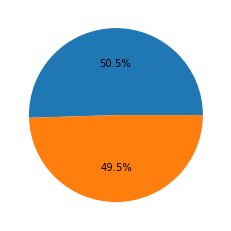

In [8]:
mplt.pie(data['sex'].value_counts().values, autopct='%1.1f%%')
mplt.show()


Voir la répartition des fumeur et non fumeur dans le dataset

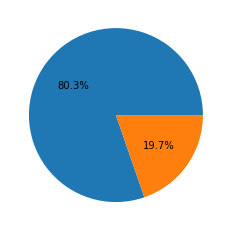

In [9]:
mplt.pie(data['smoker'].value_counts().values, autopct='%1.1f%%')
mplt.show()


# B. Analyse descriptive des Données

## Analyse descriptive univariée des variables quantitatives

In [39]:
# Filtrer les colonnes quantitative
QuantitativeData = data.select_dtypes(include=[np.number]).columns
QuantitativeData

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [40]:
#Stat descriptive des variables quantitative
print(data[QuantitativeData].info())
print( data[QuantitativeData].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               985 non-null    int64  
 1   sex               985 non-null    int64  
 2   bmi               985 non-null    float64
 3   children          985 non-null    int64  
 4   smoker            985 non-null    int64  
 5   charges           985 non-null    float64
 6   region_northwest  985 non-null    uint8  
 7   region_southeast  985 non-null    uint8  
 8   region_southwest  985 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 56.8 KB
None
              age         sex         bmi    children      smoker  \
count  985.000000  985.000000  985.000000  985.000000  985.000000   
mean    39.611168    0.504569   30.618503    1.072081    0.195939   
std     14.210599    0.500233    5.746127    1.196150    0.397123   
min     18.000000    0.000000   15.96

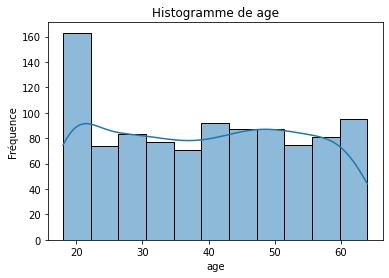

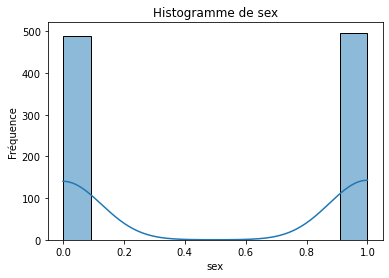

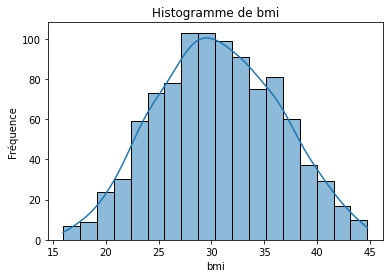

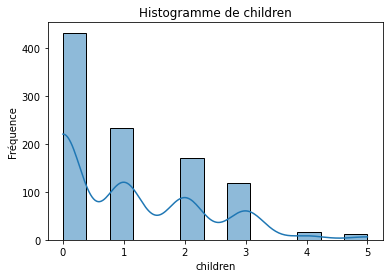

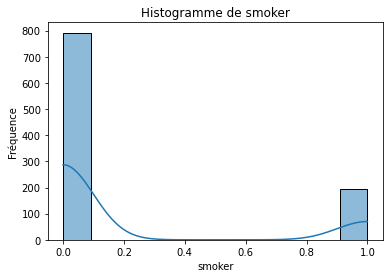

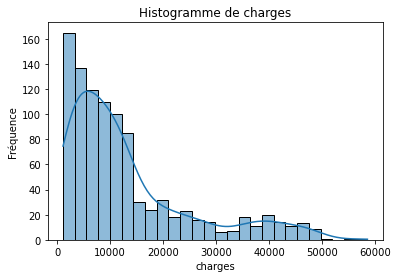

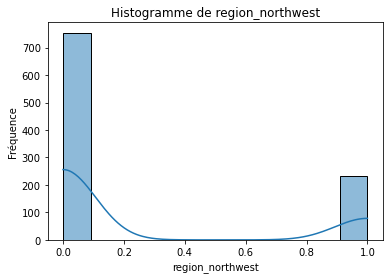

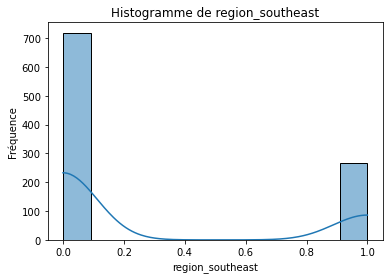

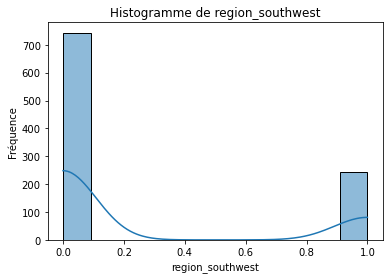

In [41]:
# Fonction pour afficher le histograme de chaque type de donnée

def Hist(DataSet):
    for colonne in DataSet:
        mplt.figure()
        sb.histplot(data[colonne], kde=True)
        mplt.title(f"Histogramme de {colonne}")
        mplt.xlabel(colonne)
        mplt.ylabel("Fréquence")
        mplt.show()
Hist(QuantitativeData)

grace au histogramme on observe la répartition des variable dans le dataset

In [42]:
# Créer des boîtes à moustaches pour chaque variable quantitative
def BoxPlot(Dataset):
    for colonne in Dataset:
        mplt.figure(figsize=(10, 6))
        sb.boxplot(data[colonne])
        mplt.title("Boîtes à moustaches")
        mplt.xlabel(colonne)
        mplt.ylabel("Valeurs")
        mplt.show()
        

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


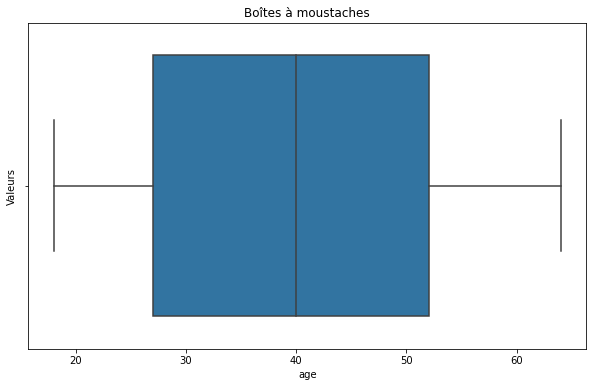

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


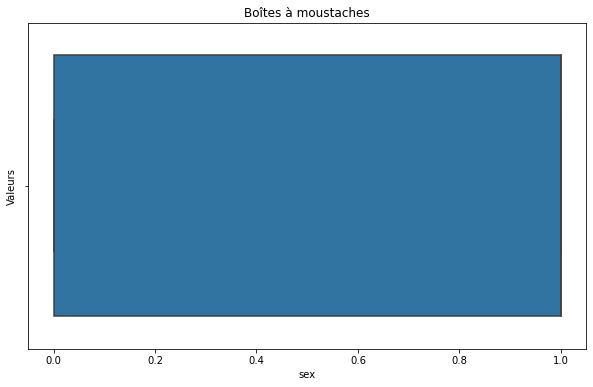

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


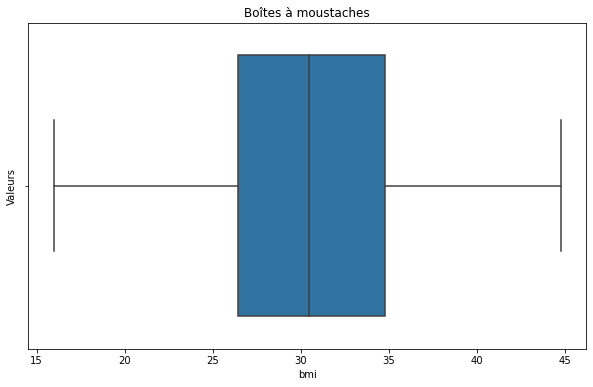

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


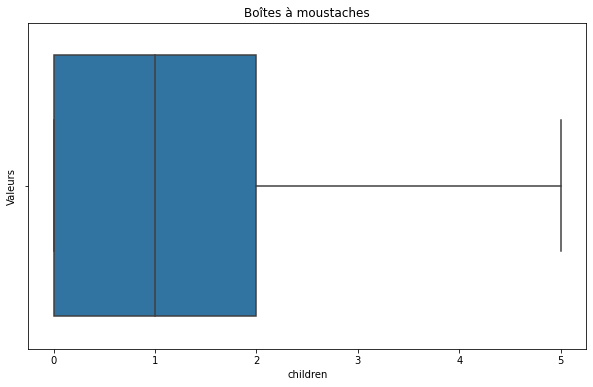

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


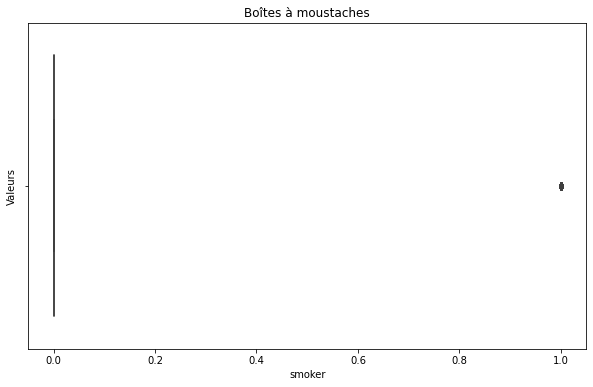

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


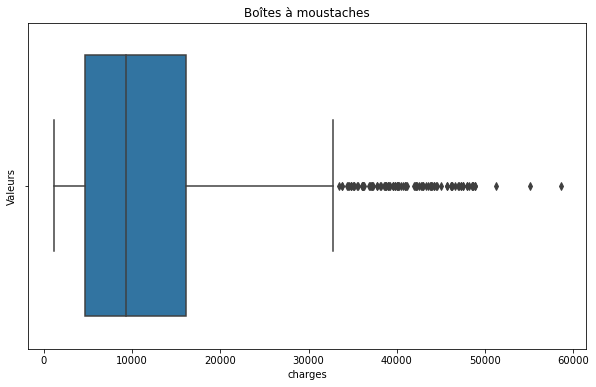

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


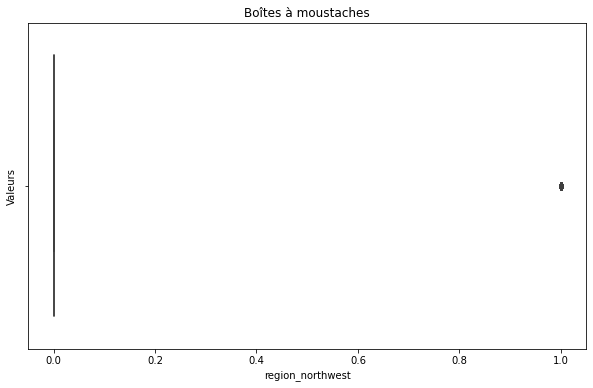

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


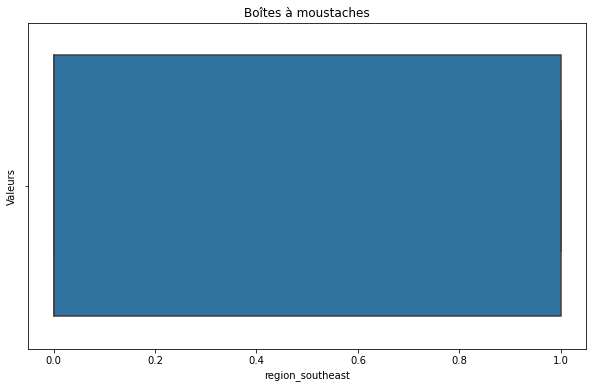

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


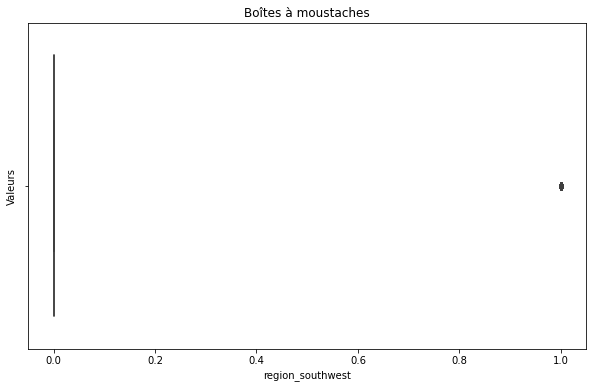

In [43]:
BoxPlot(QuantitativeData)

In [44]:
data = data[data["bmi"] < 45]

data.shape

(985, 9)

# Analyse descriptive univariée des variables qualitative

In [16]:
QualitativeData = data.select_dtypes(include=[np.object_]).columns
QualitativeData

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
#Statistique Descriptive

print(data[QualitativeData].describe())
print(data[QualitativeData].info())

         sex smoker     region
count    985    985        985
unique     2      2          4
top     male     no  southeast
freq     497    792        266
<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     985 non-null    object
 1   smoker  985 non-null    object
 2   region  985 non-null    object
dtypes: object(3)
memory usage: 30.8+ KB
None


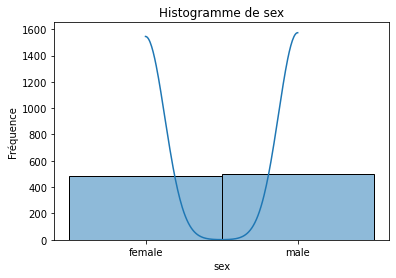

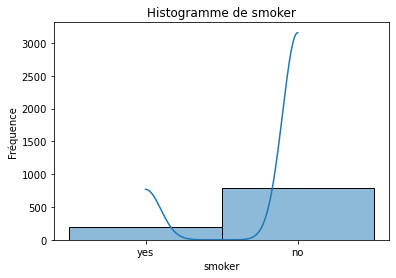

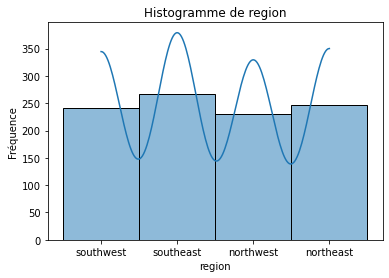

In [18]:
#Histogramme
Hist(QualitativeData)

# Analyse descriptive bivariée entre la variable cible et les variables quantitatives a l'aide de nuage de point

In [19]:
def Scatter(Dataset):
    for colonne in Dataset:
        mplt.figure(figsize=(10, 6))
        mplt.scatter(data['charges'], data[colonne], alpha=0.5)
        mplt.title(f'nuage de point représentent Charges vs {colonne}" ')
        mplt.xlabel('Charges ')
        mplt.ylabel(colonne)
        mplt.grid(True)
        mplt.show()

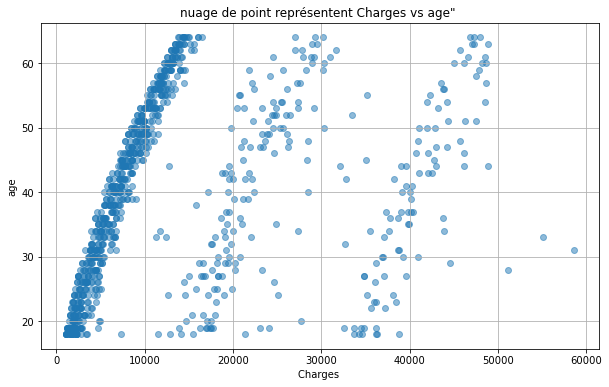

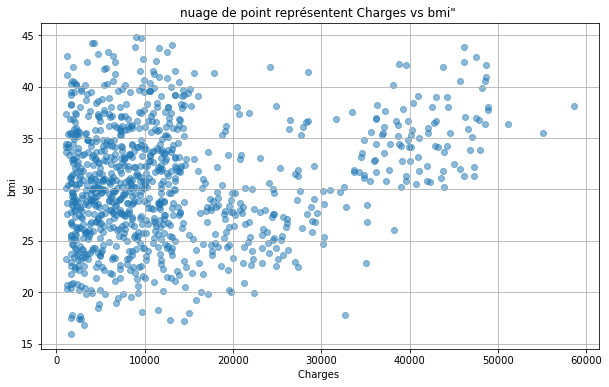

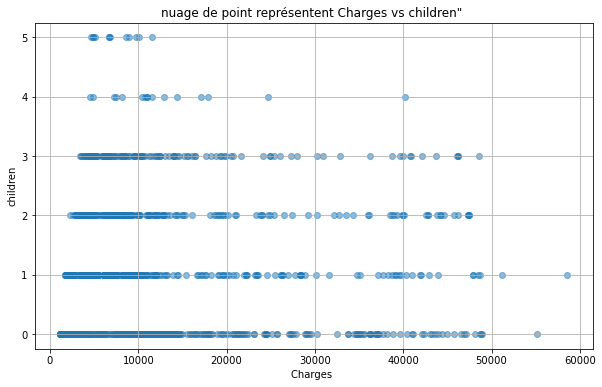

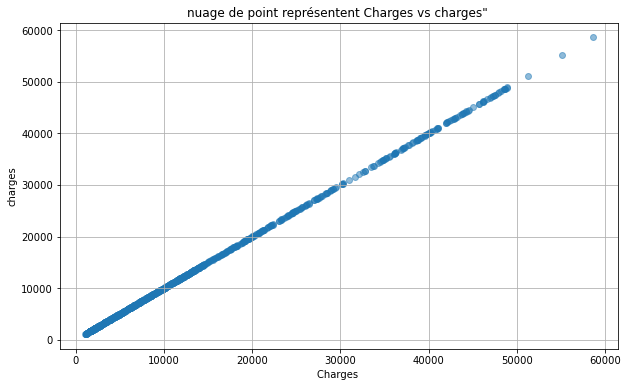

In [20]:
Scatter(QuantitativeData)

# Concevoir une matrice de corrélation entre les variables quantitatives de la base de données.

In [21]:
matix_corr = data[QuantitativeData].corr()
matix_corr

,age,bmi,children,charges
age,1.000000,0.117160,0.029990,0.337203
bmi,0.117160,1.000000,0.009207,0.182602
children,0.029990,0.009207,1.000000,0.056835
charges,0.337203,0.182602,0.056835,1.000000


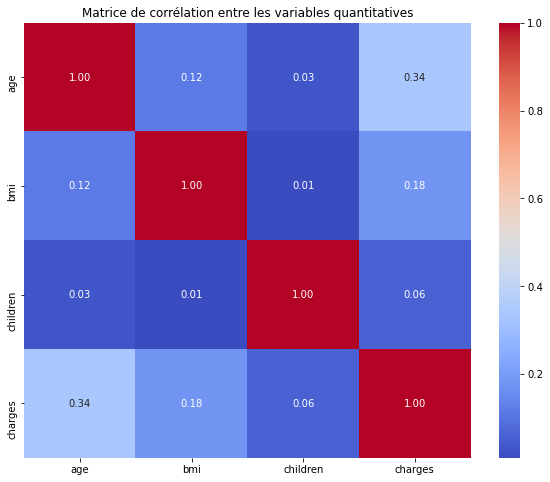

In [22]:
# Visualiser la matrice de corrélation
mplt.figure(figsize=(10, 8))
sb.heatmap(matix_corr, annot=True, cmap='coolwarm', fmt='.2f')
mplt.title("Matrice de corrélation entre les variables quantitatives")
mplt.show()

il n'y a pas de forte correlation entre les variables quantitatives presente dans notre jeu de données

# Interprétation l’ensemble des résultats issus de l’analyse descriptive. ??

# c. Faire le pré-traitement des données


# Convertir les variables qualitatives au format approprié pour la modélisation

In [23]:
# Conversion des variables qualitatives en variables numériques
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
#data['region'] = data['region'].map({'southeast': 0, 'northeast': 1, 'southwest': 2, 'northwest': 3})

data = pd.get_dummies(data , columns=['region'] , drop_first=True)

<ipython-input-23-0e8f7707823e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].map({'female': 0, 'male': 1})
<ipython-input-23-0e8f7707823e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})


In [24]:
data.head(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
5,31,0,25.740,0,0,3756.62160,0,1,0
6,46,0,33.440,1,0,8240.58960,0,1,0
7,37,0,27.740,3,0,7281.50560,1,0,0
8,37,1,29.830,2,0,6406.41070,0,0,0
9,60,0,25.840,0,0,28923.13692,1,0,0


# Séparer la variable cible des variables explicatives

In [25]:
# Séparer la variable cible (charges) des variables explicatives

X = data.drop(columns=['charges'])
y = data['charges']


# Diviser  la  base  de  données  en  échantillon  d’apprentissage  (80%)  et  en échantillon test (20%)

In [26]:
#  Séparer la variable cible (charges) des variables explicatives
X = data.drop(columns=['charges'])
y = data['charges']

In [27]:
# Diviser les données en échantillon d'apprentissage (80%) et en échantillon test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train: {X_train.shape}")
print(f"Taille de X_test: {X_test.shape}")
print(f"Taille de y_train: {y_train.shape}")
print(f"Taille de y_test: {y_test.shape}")


Taille de X_train: (788, 8)
Taille de X_test: (197, 8)
Taille de y_train: (788,)
Taille de y_test: (197,)


In [28]:
# Étape 4 : Normaliser les données (standardisation)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrainement du model Knn

In [29]:
# Fonction pour entraîner et évaluer un modèle KNN
def train_evaluate_knn(k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error pour k={k}: {mse}")
    r2 = r2_score(y_test, y_pred)
    print(f"Coefficient de détermination (R^2) du modèle optimisé : {r2}")

    return mse , knn


In [30]:

# Modèle M1 avec k=3
M1 = train_evaluate_knn(3)

# Modèle M2 avec k=7
M2 = train_evaluate_knn(7)

# Modèle M3 avec k=10
M3 = train_evaluate_knn(10)

Mean Squared Error pour k=3: 34745405.833289914
Coefficient de détermination (R^2) du modèle optimisé : 0.7650604264141132
Mean Squared Error pour k=7: 32531500.661938265
Coefficient de détermination (R^2) du modèle optimisé : 0.7800302885999968
Mean Squared Error pour k=10: 35605614.980172426
Coefficient de détermination (R^2) du modèle optimisé : 0.7592439115305938


On observe une tendance où l'augmentation de la valeur de k entraîne une diminution du MSE, ce qui suggère que les modèles avec des valeurs de k plus élevées peuvent offrir de meilleures performances dans ce contexte.

# Facultatif : Sauvegarder les échantillons dans des fichiers CSV

In [31]:
# # Facultatif : Sauvegarder les échantillons dans des fichiers CSV
X_train_data = pd.DataFrame(X_train, columns=data.drop(columns=['charges']).columns)
X_test_data = pd.DataFrame(X_test, columns=data.drop(columns=['charges']).columns)

X_train_data.to_csv('../Data/X_train.csv', index=False)
X_test_data.to_csv('../Data/X_test.csv', index=False)
y_train.to_csv('../Data/y_train.csv', index=False)
y_test.to_csv('../Data/y_test.csv', index=False)

# Optimisation pour K=10

In [32]:
# Définir le modèle KNN de base avec k=10
knn_k10 = KNeighborsRegressor(n_neighbors=10)


In [33]:
# Définir la grille des hyperparamètres à tester
param_grid = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # p=1 pour la distance de Manhattan, p=2 pour la distance Euclidienne
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=knn_k10, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=10), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [34]:

# Afficher les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Entraîner le modèle avec les meilleurs paramètres
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Évaluer les performances du modèle optimisé
mse_optimized = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error du modèle optimisé : {mse_optimized}")
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R^2) du modèle optimisé : {r2}")

# Afficher les résultats de GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
#results.to_csv('./data/grid_search_results.csv', index=False)

Meilleurs hyperparamètres : {'algorithm': 'brute', 'p': 2, 'weights': 'distance'}
Mean Squared Error du modèle optimisé : 34515787.64302754
Coefficient de détermination (R^2) du modèle optimisé : 0.7666130460601938


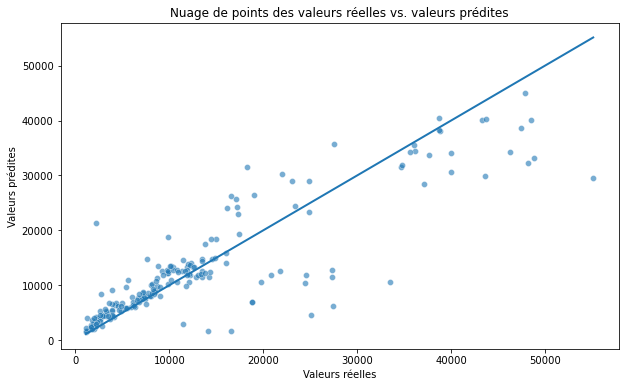

In [35]:
# Créer le nuage de points
mplt.figure(figsize=(10, 6))
sb.scatterplot(x=y_test, y=y_pred, alpha=0.6)
mplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', linewidth=2)
mplt.xlabel('Valeurs réelles')
mplt.ylabel('Valeurs prédites')
mplt.title('Nuage de points des valeurs réelles vs. valeurs prédites')
mplt.show()